In [36]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns

In [38]:
# Read spotify songs dataset
data_frame = pd.read_csv("song_data.csv")

In [39]:
# Filtering dataset by dropping unwanted columns
data_frame = data_frame.drop(["song_duration_ms","audio_mode"], axis="columns")

# Using preprocessing from sklearn to normalize the data
scalar = preprocessing.MinMaxScaler()

# Normalizing loudness featuer
loud = data_frame[["loudness"]].values
scaled_data = scalar.fit_transform(loud)
data_frame["loudness"] = pd.DataFrame(scaled_data)

# Normalizing tempo feature
temp = data_frame[["tempo"]].values
scaled_data = scalar.fit_transform(temp)
data_frame["tempo"] = pd.DataFrame(scaled_data)


data_frame.head()

,song_name,song_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
0,2:00 AM,57,0.119,0.663,0.762,0.000,0,0.1610,0.878274,0.0435,0.577935,4,0.321,KONO,2:00 AM,Wake Up Happy
1,03:15,76,0.385,0.651,0.654,0.000,1,0.1810,0.824895,0.0466,0.585904,4,0.539,Bazzi,COSMIC,Young & Free
2,06:30,74,0.149,0.757,0.579,0.000,1,0.0543,0.865884,0.0809,0.412549,4,0.560,Geko,06:30,Power Workout
3,06:30,74,0.149,0.757,0.579,0.000,1,0.0543,0.865884,0.0809,0.412549,4,0.560,Geko,06:30,Rap UK
4,3:00 PM,47,0.810,0.548,0.438,0.282,10,0.0862,0.803013,0.1610,0.742859,4,0.447,Neotic,Hours,Chill Instrumental Beats


In [40]:
# Computing number of clusters based of features 'acousticness','danceability','energy','liveness','loudness','speechiness',
# 'tempo','audio_valence'.
songs_features = data_frame.copy()
songs_features = songs_features.drop(['song_popularity','key','time_signature','song_name','artist_name','album_names',
                                     'playlist','acousticness','instrumentalness'],axis=1)



In [41]:
# Using K means and silhouette method to find number of clusters.
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

#     score = silhouette_score (songs_features, preds, metric='euclidean')
#     print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))



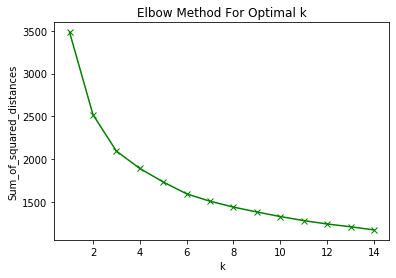

In [42]:
# Using Elbow method to get the optimal value of K (number of clusters that will defined the most of the dataset)
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [43]:
# Based on the graph we decide to take value of K as 3 snd fit the features to those clusters.
kmeans = KMeans(n_clusters=3)
kmeans.fit(songs_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
# Computing PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

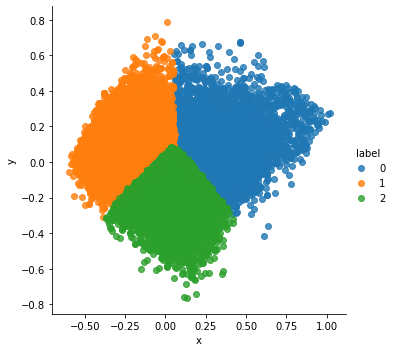

In [45]:
#plot data with seaborn
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [46]:
# counting the number of songs in each labels.
data_frame['label'] = y_kmeans

data_frame['label'].value_counts()

1    7813
2    6061
0    4961
Name: label, dtype: int64

In [47]:
data_frame

,song_name,song_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,label
0,2:00 AM,57,0.119000,0.663,0.762,0.000000,0,0.1610,0.878274,0.0435,0.577935,4,0.3210,KONO,2:00 AM,Wake Up Happy,2
1,03:15,76,0.385000,0.651,0.654,0.000000,1,0.1810,0.824895,0.0466,0.585904,4,0.5390,Bazzi,COSMIC,Young & Free,2
2,06:30,74,0.149000,0.757,0.579,0.000000,1,0.0543,0.865884,0.0809,0.412549,4,0.5600,Geko,06:30,Power Workout,1
3,06:30,74,0.149000,0.757,0.579,0.000000,1,0.0543,0.865884,0.0809,0.412549,4,0.5600,Geko,06:30,Rap UK,1
4,3:00 PM,47,0.810000,0.548,0.438,0.282000,10,0.0862,0.803013,0.1610,0.742859,4,0.4470,Neotic,Hours,Chill Instrumental Beats,0
5,3,59,0.875000,0.709,0.293,0.045400,1,0.1030,0.682799,0.2410,0.350659,4,0.3830,digitalluc,re:ups,Chill Instrumental Beats,0
6,9.13,26,0.975000,0.289,0.451,0.942000,2,0.2220,0.588680,0.0538,0.543583,3,0.5900,Khalid,Suncity,United States Top 50,0
7,17,76,0.001490,0.703,0.832,0.127000,0,0.0696,0.782247,0.0689,0.503590,4,0.6670,MK,17,Running Workout Goals,1
8,18,53,0.877000,0.483,0.305,0.000068,11,0.1260,0.758754,0.2680,0.327908,4,0.2730,emawk,18,Low-Key,0
9,18,53,0.877000,0.483,0.305,0.000068,11,0.1260,0.758754,0.2680,0.327908,4,0.2730,emawk,18,Mellow Bars,0


In [48]:
data_frame[data_frame['label']==0].mean()

song_popularity     53.321508
acousticness         0.494043
danceability         0.591799
energy               0.381687
instrumentalness     0.143778
key                  5.103003
liveness             0.146312
loudness             0.690908
speechiness          0.087637
tempo                0.470173
time_signature       3.893973
audio_valence        0.315509
label                0.000000
dtype: float64

In [49]:
data_frame[data_frame['label']==1].mean()

song_popularity     52.364521
acousticness         0.220487
danceability         0.703546
energy               0.705681
instrumentalness     0.043598
key                  5.344554
liveness             0.170763
loudness             0.793878
speechiness          0.105769
tempo                0.498103
time_signature       3.986049
audio_valence        0.763255
label                1.000000
dtype: float64

In [50]:
data_frame[data_frame['label']==2].mean()

song_popularity     53.530770
acousticness         0.114828
danceability         0.576867
energy               0.782287
instrumentalness     0.068531
key                  5.370236
liveness             0.218395
loudness             0.823114
speechiness          0.109206
tempo                0.525758
time_signature       3.977726
audio_valence        0.398565
label                2.000000
dtype: float64

In [51]:
# row_indexes1=data_frame[data_frame['audio_valence']>=0.50].index
# data_frame.loc[row_indexes1,'tag']="Happy"
# row_indexes2=data_frame[data_frame['audio_valence']<=0.50].index
# data_frame.loc[row_indexes2,'tag']="Sad"

average = (data_frame['energy']+data_frame['loudness'])/2
row_indexes1=data_frame[data_frame['audio_valence'] > 0.50].index
data_frame.loc[row_indexes1,'tag']="Happy"
row_indexes2=data_frame[(data_frame['audio_valence'] < 0.50) & (average > data_frame['audio_valence'])].index
data_frame.loc[row_indexes2,'tag']="Energetic"
row_indexes3=data_frame[(data_frame['audio_valence'] < 0.30) & ( data_frame['liveness'] < 0.30)].index
data_frame.loc[row_indexes3,'tag']="Sad"

In [52]:
# data_frame[data_frame['label'] == 0]

In [53]:
# data_frame[data_frame['label']==0].sort_values(by=['song_popularity'],ascending = False).sample(10)

In [54]:
data_frame['tag'].value_counts()

Happy        10102
Energetic     5117
Sad           3446
Name: tag, dtype: int64

In [55]:
x = data_frame[data_frame['label'] == 0] 
x['tag'].value_counts()

Sad          2263
Energetic    1811
Happy         725
Name: tag, dtype: int64

In [56]:
x = data_frame[data_frame['label'] == 1] 
x['tag'].value_counts()

Happy        7774
Energetic      36
Name: tag, dtype: int64

In [57]:
x = data_frame[data_frame['label'] == 2] 
x['tag'].value_counts()

Energetic    3270
Happy        1603
Sad          1183
Name: tag, dtype: int64

In [58]:
data_frame.to_csv('final_dataset', index= False)